In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp  # to solve ODE system

In [2]:
seed = 1234
method = "LSODA"

# Predator-Prey

In [3]:
tmax = 400
step = tmax*20
time_list = np.linspace(0, tmax, step)
num_of_points = step/4

## Parameter values

In [4]:
tetay=0.1
r=0.3
K=88
xc=65
a_yx=0.2
Th_yx=1
ef_xy=1
m=0.52
q=0.6

In [5]:
def model_exponential_density_mediated(
    t,
    X,
    tetay=tetay,
    r=r,
    K=K,
    xc=xc,
    a_yx=a_yx,
    Th_yx=Th_yx,
    ef_xy=ef_xy,
    m=m,
    q=q,
):
    x, y = X
    RF2_yx=(a_yx*x)/(1+a_yx*Th_yx*x)
    EA_x=((x-xc)/K)
    EA_y=(y/(tetay+y))
    x_prime=r*x*EA_x*(1-(x/K))-RF2_yx*y
    y_prime=ef_xy*RF2_yx*EA_y*y-m*y-q*y**2
    return x_prime, y_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    tetay=tetay,
    r=r,
    K=K,
    xc=xc,
    a_yx=a_yx,
    Th_yx=Th_yx,
    ef_xy=ef_xy,
    m=m,
    q=q,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(tetay,r,K,xc,a_yx,Th_yx,ef_xy,m,q),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

## Top Row

In [6]:
y0 = np.array([71, 0.2])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,tetay=tetay,r=r,K=K,xc=xc,a_yx=a_yx,Th_yx=Th_yx,ef_xy=ef_xy,m=m,q=q)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


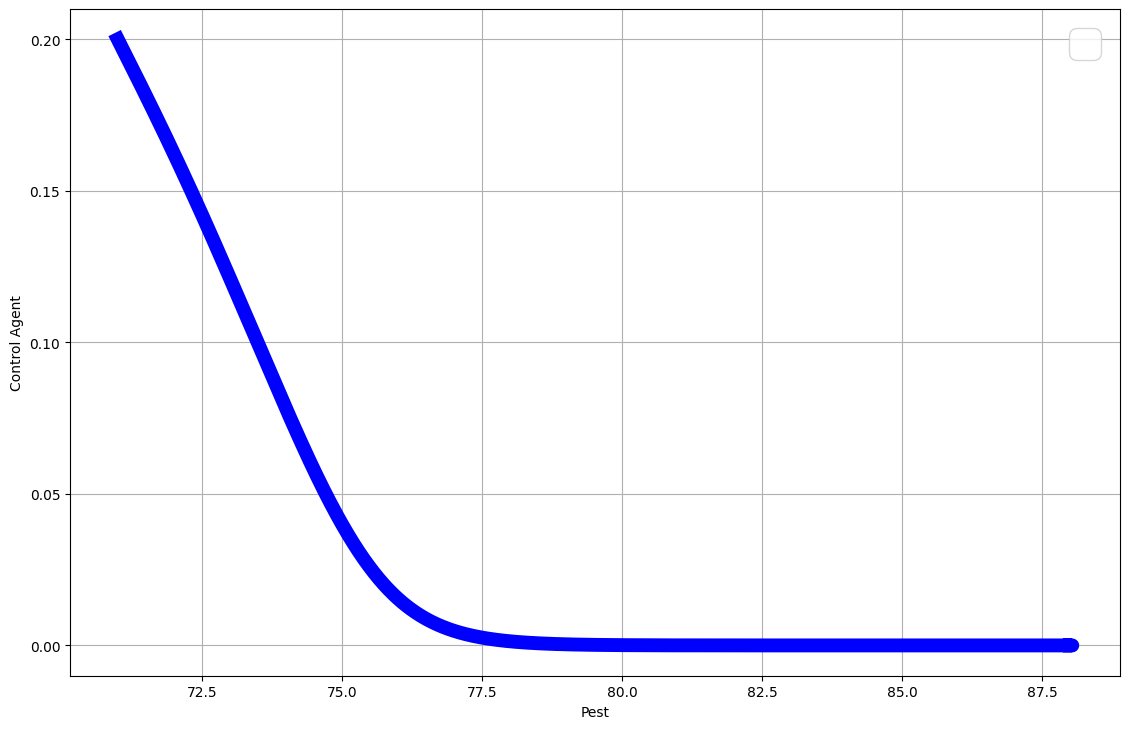

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Prey, Predator, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Pest")
plt.ylabel("Control Agent")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

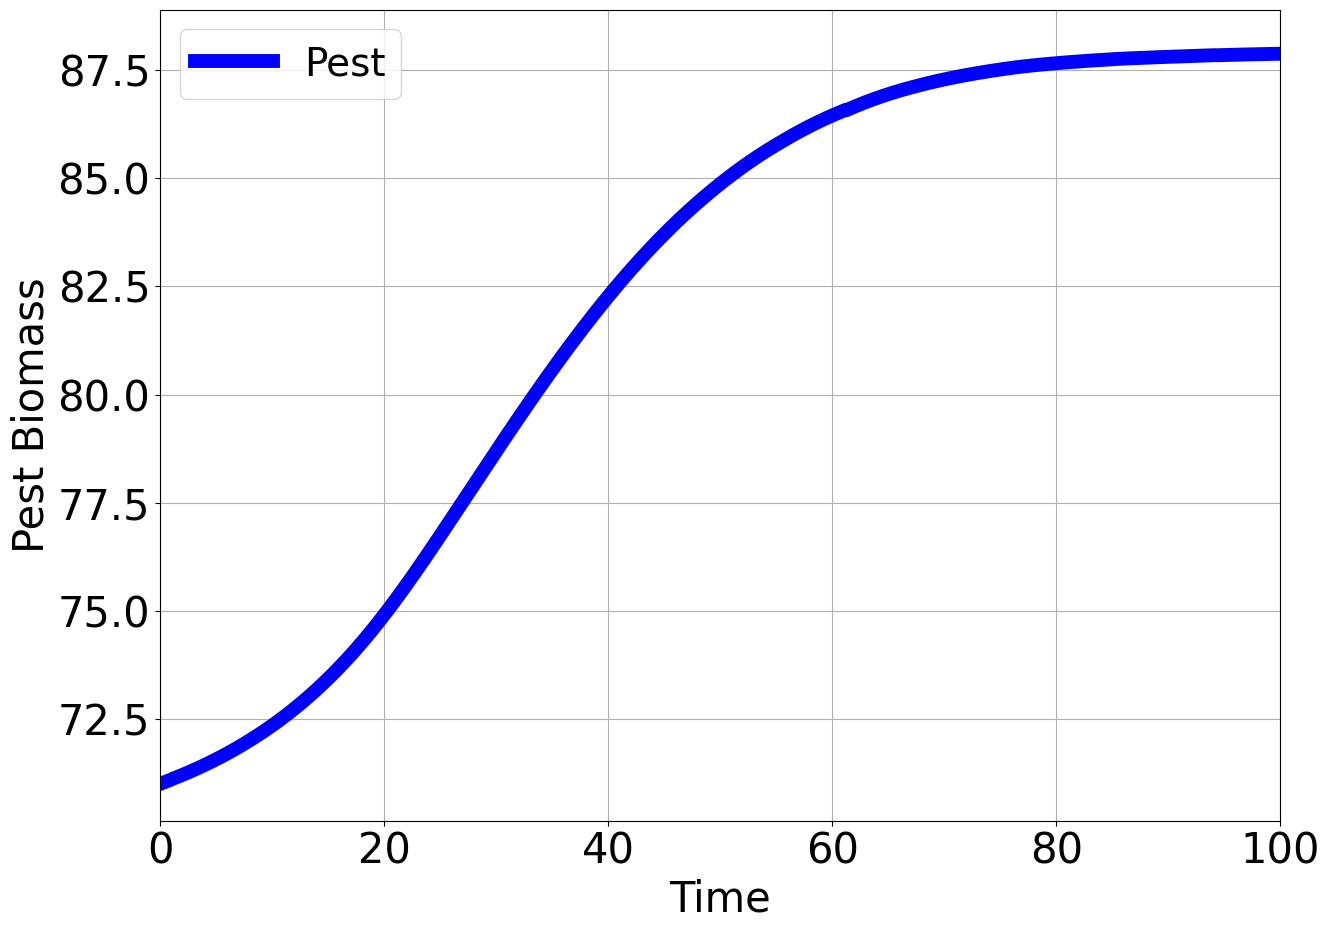

In [8]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_top_prey.png', format='png')
plt.tight_layout()
plt.show()

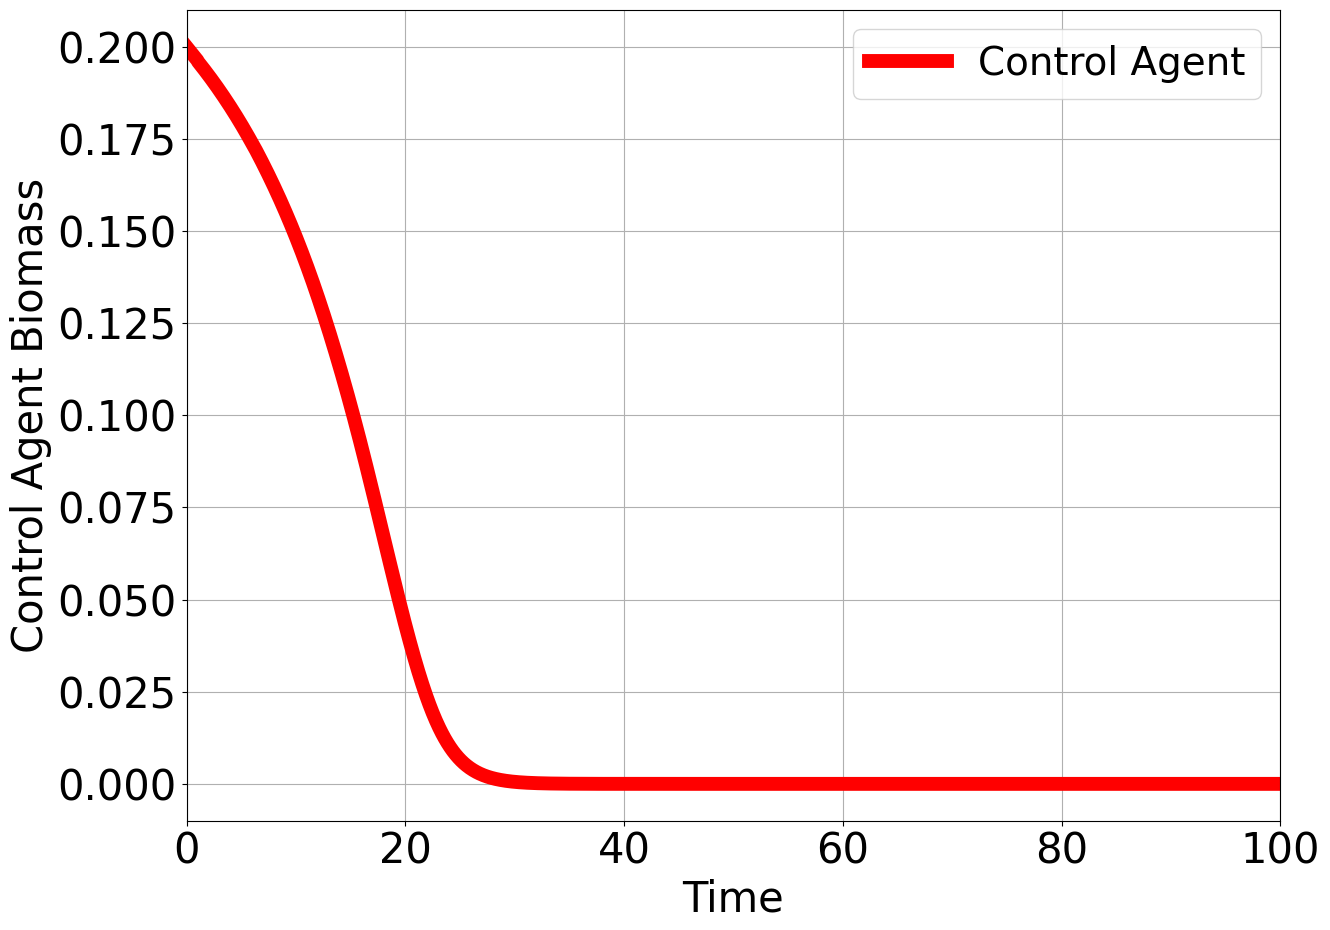

In [9]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_top_predator.png', format='png')
plt.tight_layout()
plt.show()

## Middle Row

In [10]:
y0 = np.array([71, 0.28])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,tetay=tetay,r=r,K=K,xc=xc,a_yx=a_yx,Th_yx=Th_yx,ef_xy=ef_xy,m=m,q=q)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

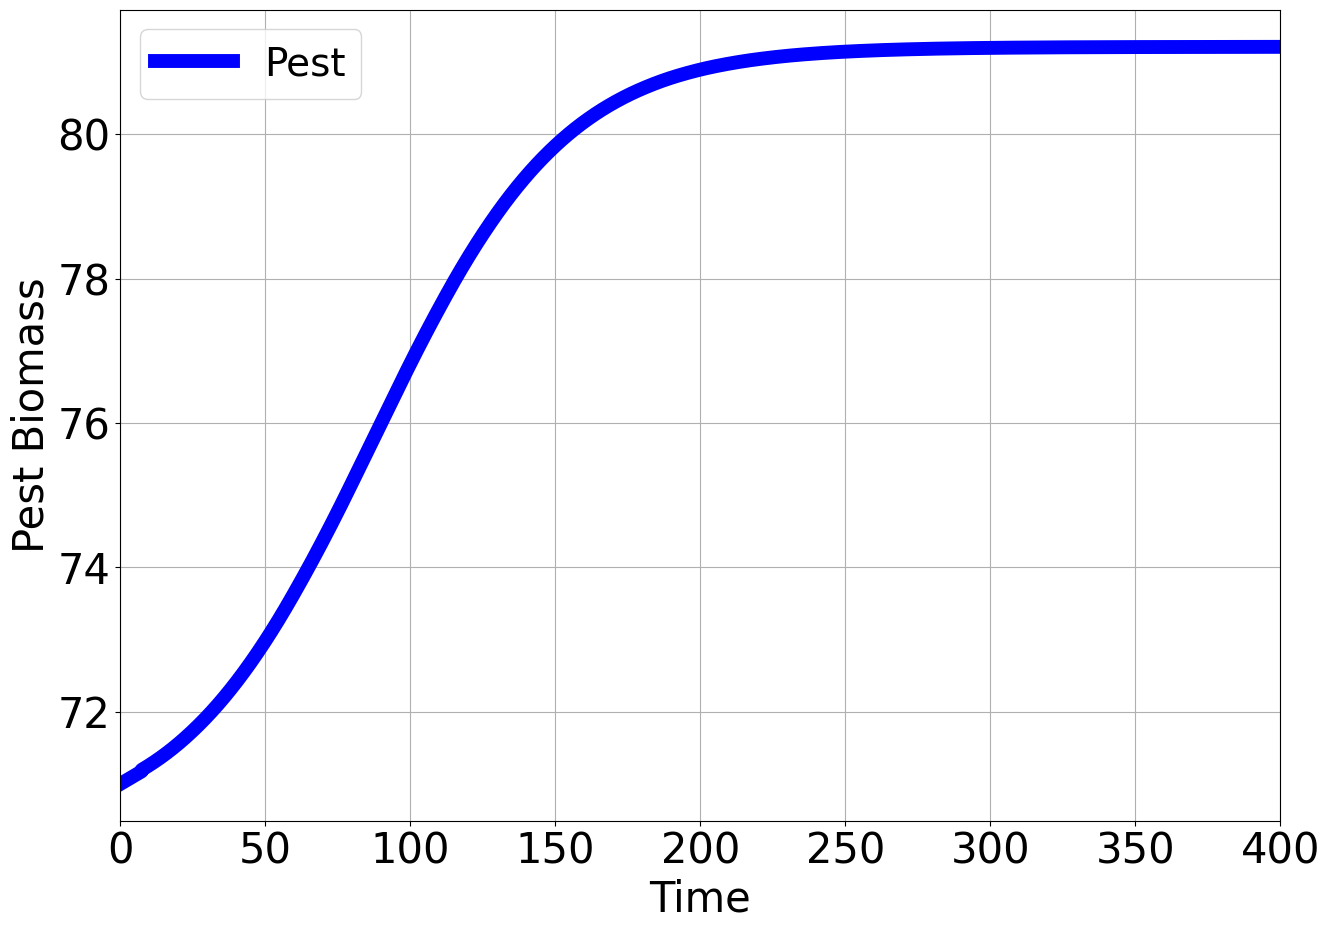

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_middle_prey.png', format='png')
plt.tight_layout()
plt.show()

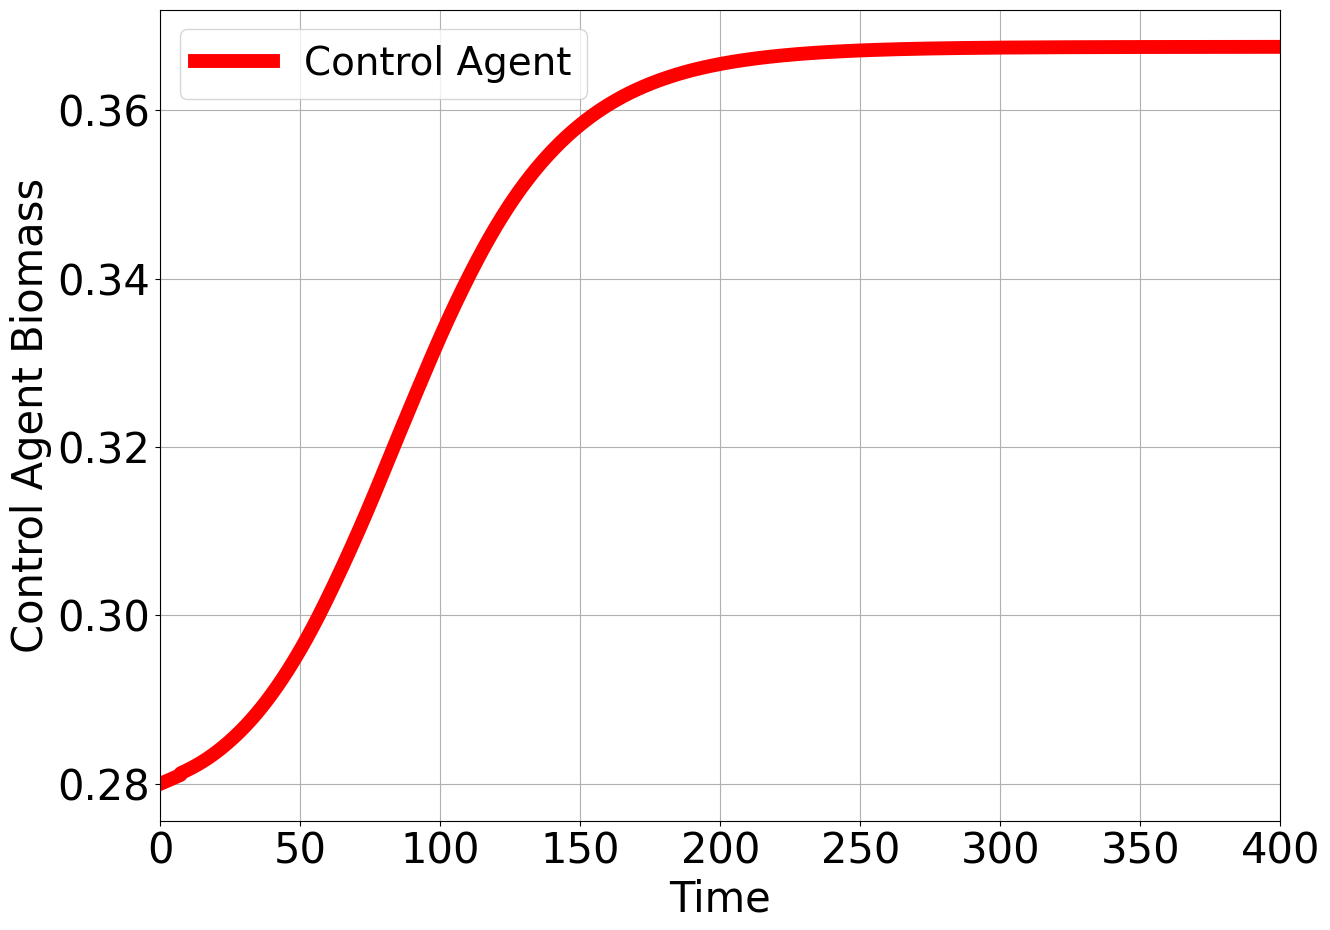

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_middle_predator.png', format='png')
plt.tight_layout()
plt.show()

## Bottom Row

In [13]:
y0 = np.array([71, 4])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,tetay=tetay,r=r,K=K,xc=xc,a_yx=a_yx,Th_yx=Th_yx,ef_xy=ef_xy,m=m,q=q)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

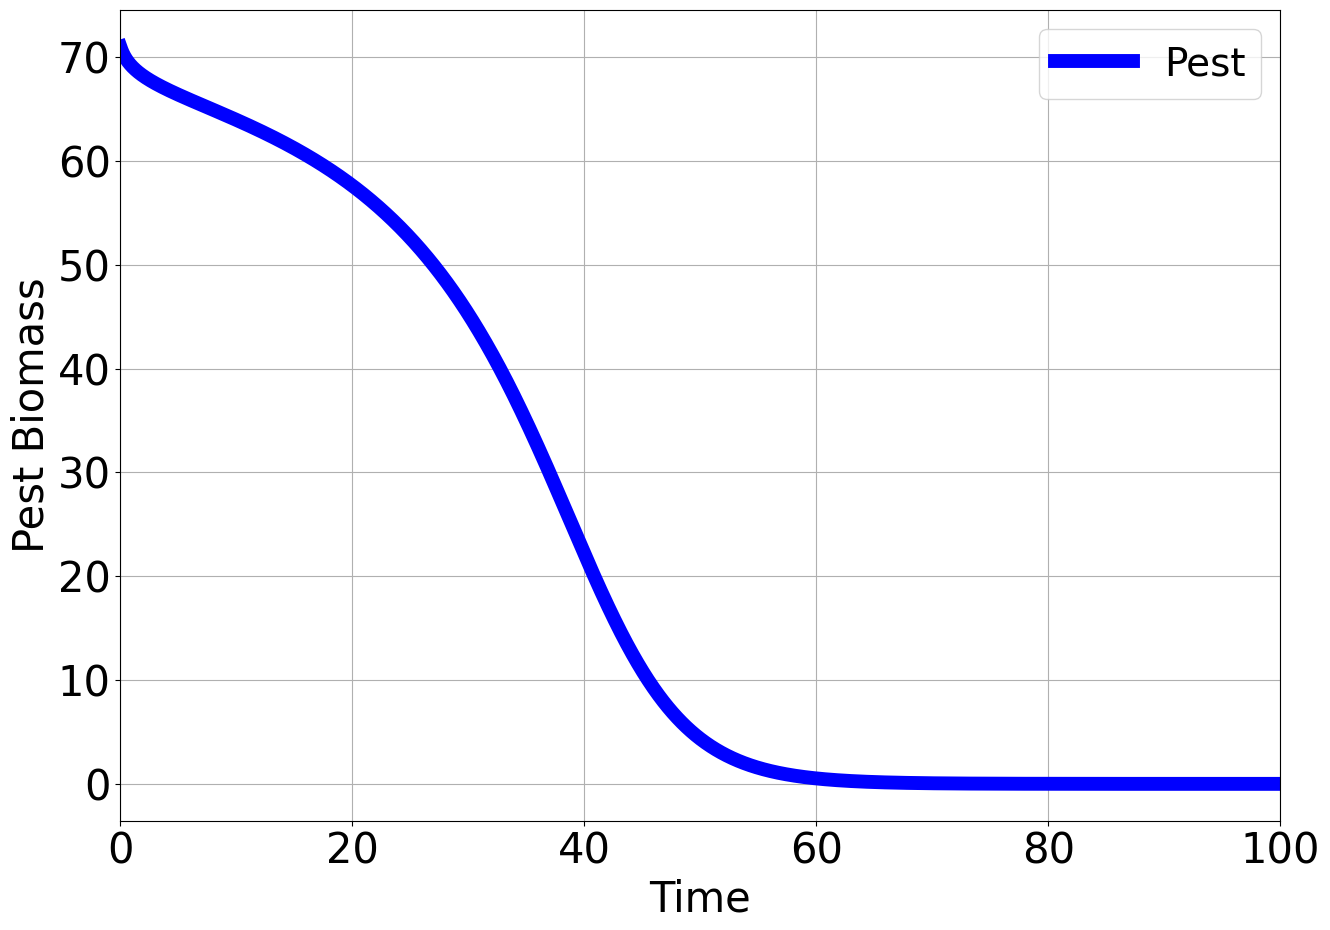

In [14]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_bottom_prey.png', format='png')
plt.tight_layout()
plt.show()

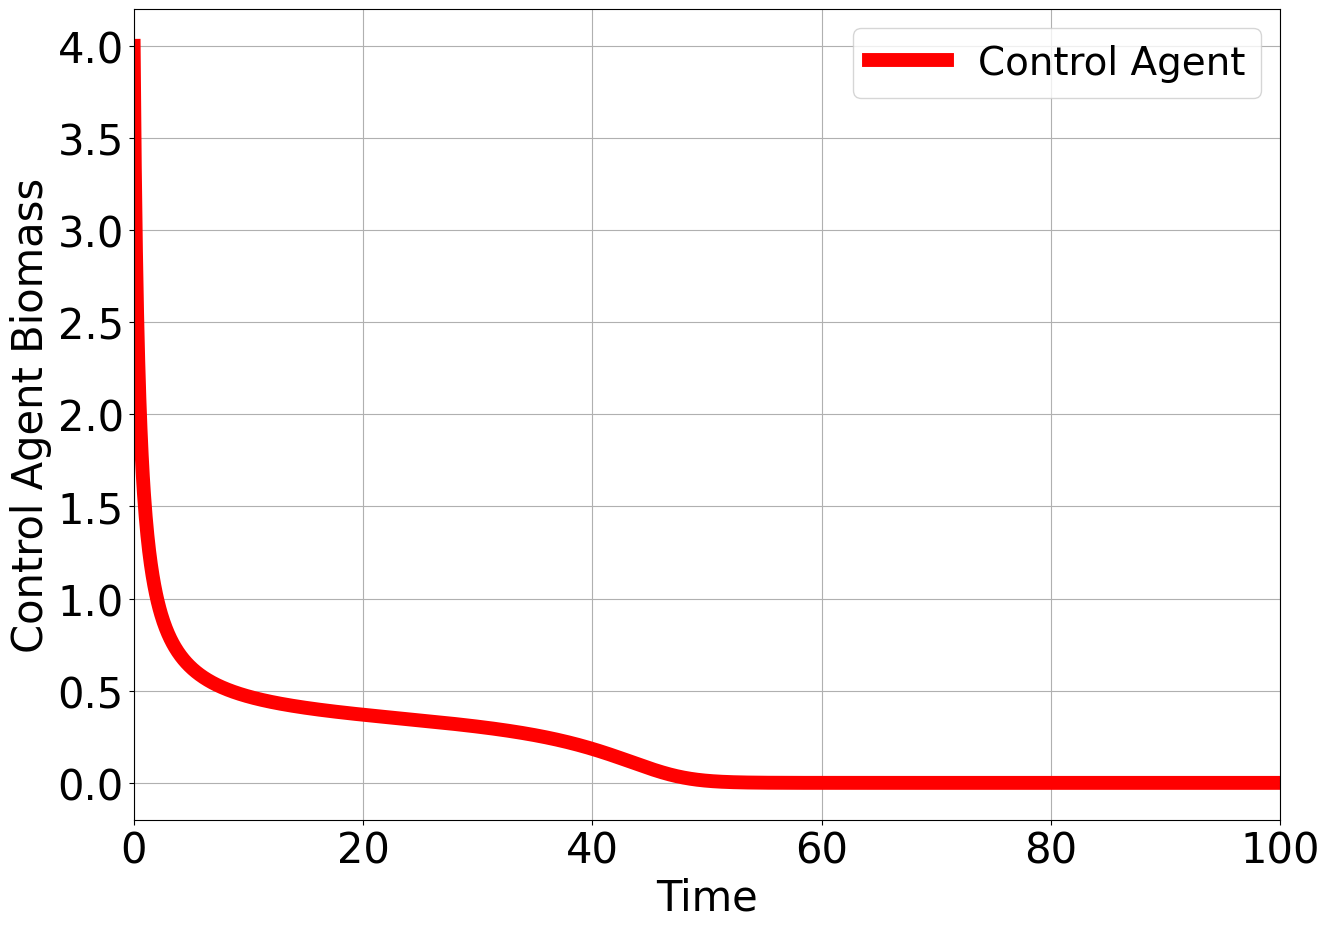

In [15]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/predator_prey_bottom_predator.png', format='png')
plt.tight_layout()
plt.show()

# Tritrophic

In [16]:
tmax = 100
step = tmax*20
time_list = np.linspace(0, tmax, step)
num_of_points = step/4

## Parameter values

In [17]:
r_R=12
K_R=3
R_c=0.5
a_CR=1
Th_CR=0.15
tetaC=4.5
ef_RC=2
mC=1
P=0.6
a_PC=0.5
Th_PC=1

In [18]:
def model_exponential_density_mediated(
    t,
    X,
    r_R=r_R,
    K_R=K_R,
    R_c=R_c,
    a_CR=a_CR,
    Th_CR=Th_CR,
    tetaC=tetaC,
    ef_RC=ef_RC,
    mC=mC,
    P=P,
    a_PC=a_PC,
    Th_PC=Th_PC,
):
    R, C = X
    RF_2_CR=(a_CR*R)/(1+a_CR*Th_CR*R)
    RF_2_PC=(a_PC*C)/(1+a_PC*Th_PC*C)
    EA_C=(C/(tetaC+C))
    x_prime=r_R*((R-R_c)/K_R)*R*(1-R/K_R)-RF_2_CR*C
    y_prime=ef_RC*RF_2_CR*EA_C*C-RF_2_PC*P-mC*C
    return x_prime, y_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    r_R=r_R,
    K_R=K_R,
    R_c=R_c,
    a_CR=a_CR,
    Th_CR=Th_CR,
    tetaC=tetaC,
    ef_RC=ef_RC,
    mC=mC,
    P=P,
    a_PC=a_PC,
    Th_PC=Th_PC,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(r_R,K_R,R_c,a_CR,Th_CR,tetaC,ef_RC,mC,P,a_PC,Th_PC),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

## Top Row

In [19]:
y0 = np.array([2.1, 2.3])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,r_R=r_R,K_R=K_R,R_c=R_c,a_CR=a_CR,Th_CR=Th_CR,tetaC=tetaC,ef_RC=ef_RC,mC=mC,P=P,a_PC=a_PC,Th_PC=Th_PC)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


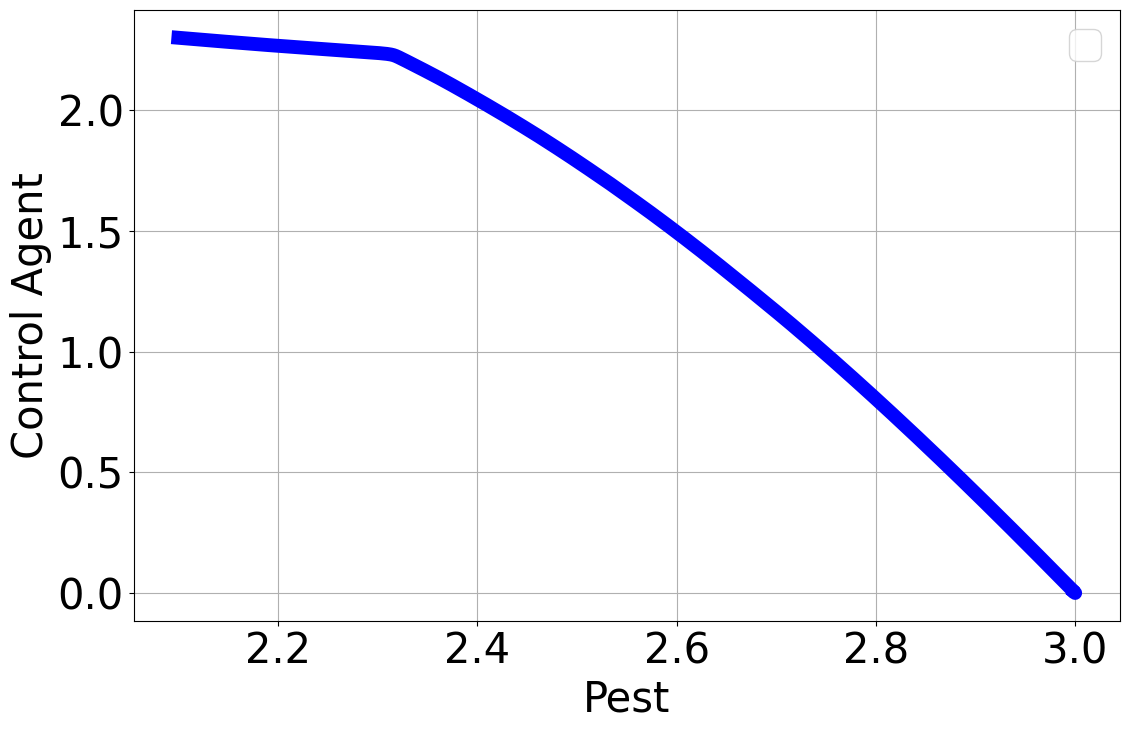

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Prey, Predator, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Pest")
plt.ylabel("Control Agent")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

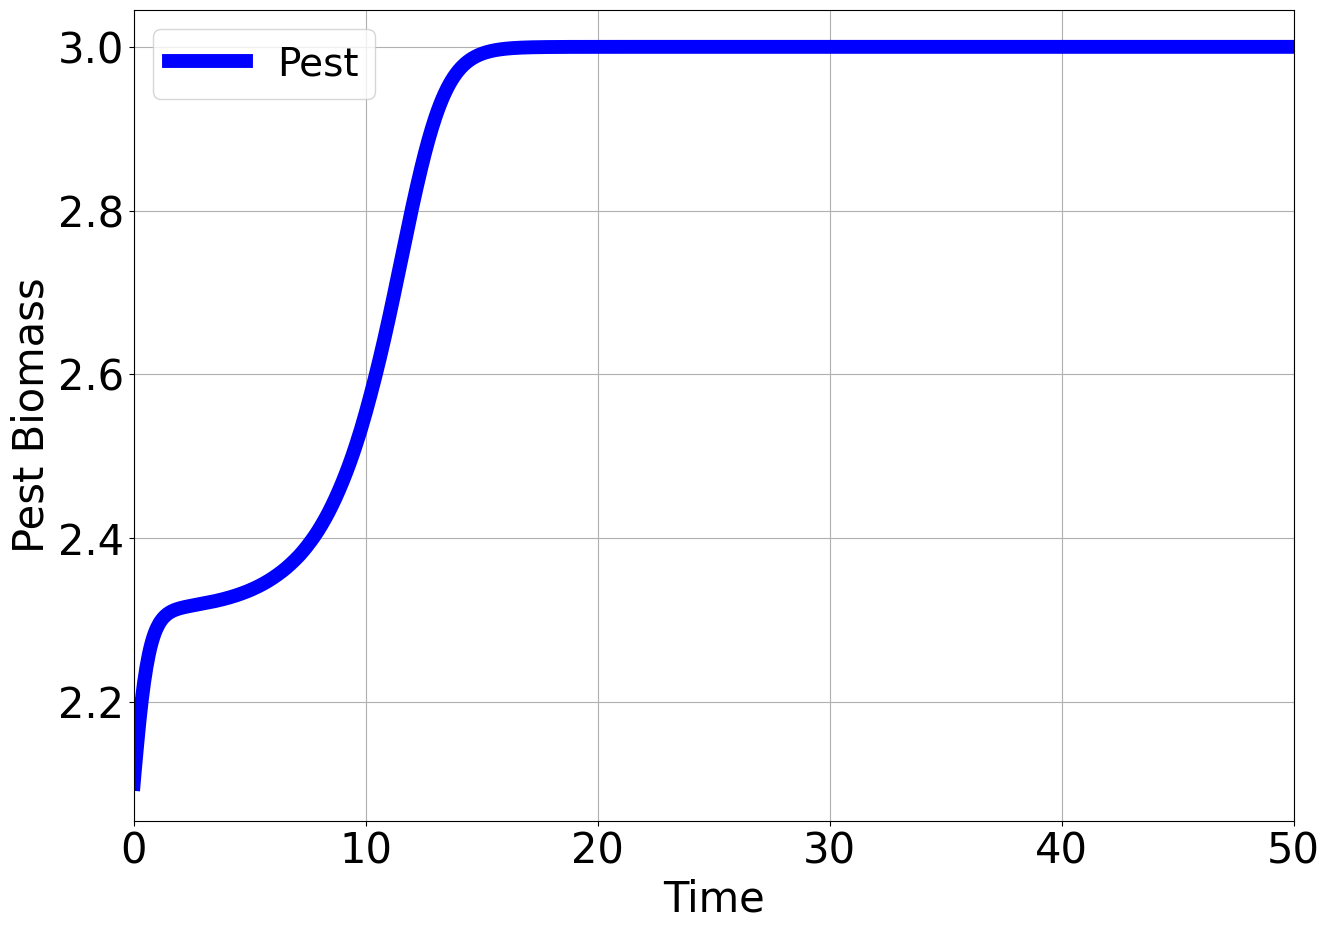

In [21]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_top_prey.png', format='png')
plt.tight_layout()
plt.show()

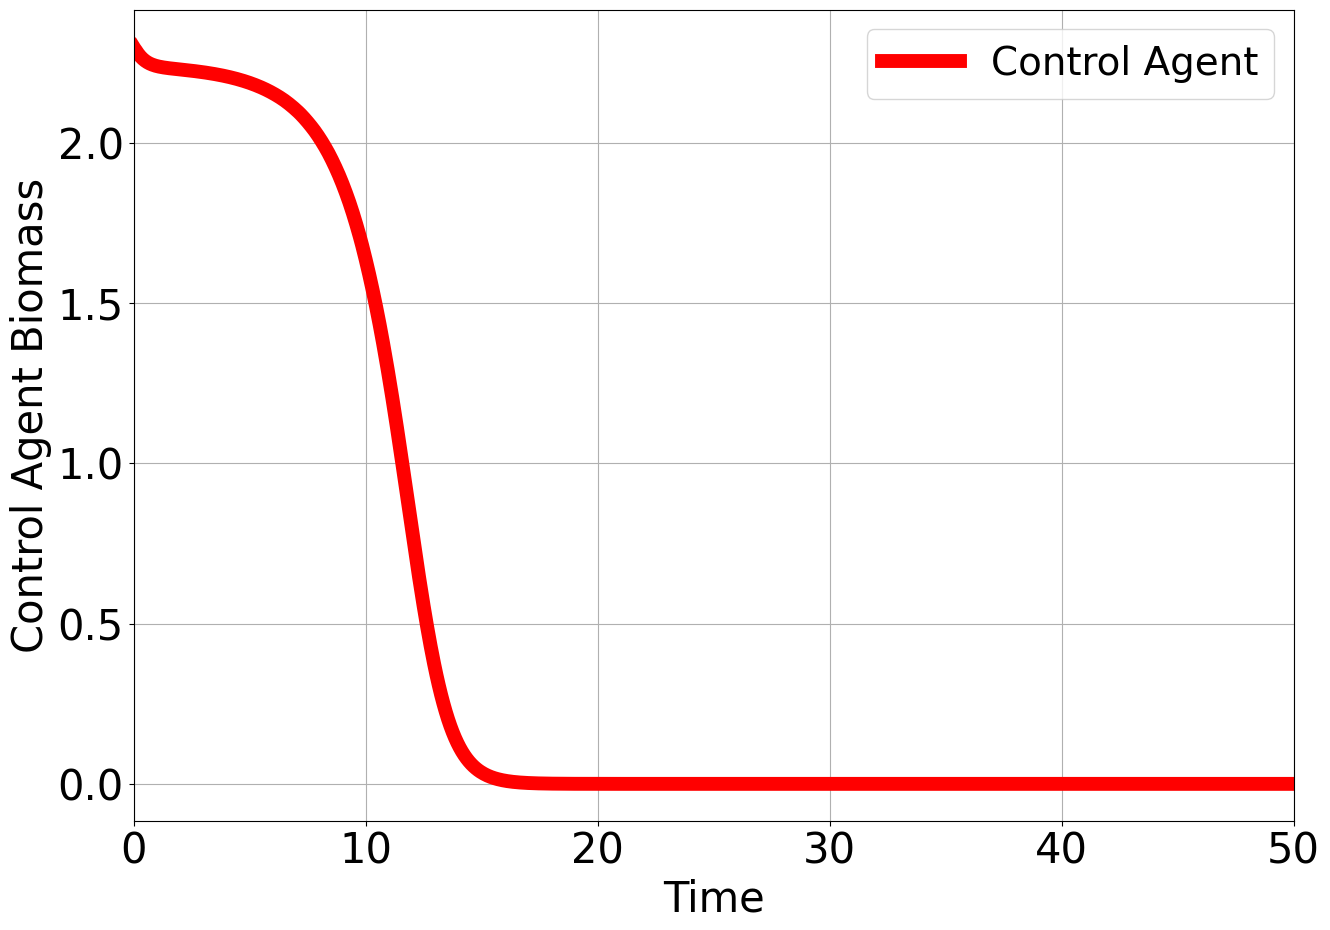

In [22]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 50])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_top_predator.png', format='png')
plt.tight_layout()
plt.show()

## Middle Row

In [23]:
y0 = np.array([2.1, 2.4])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,r_R=r_R,K_R=K_R,R_c=R_c,a_CR=a_CR,Th_CR=Th_CR,tetaC=tetaC,ef_RC=ef_RC,mC=mC,P=P,a_PC=a_PC,Th_PC=Th_PC)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

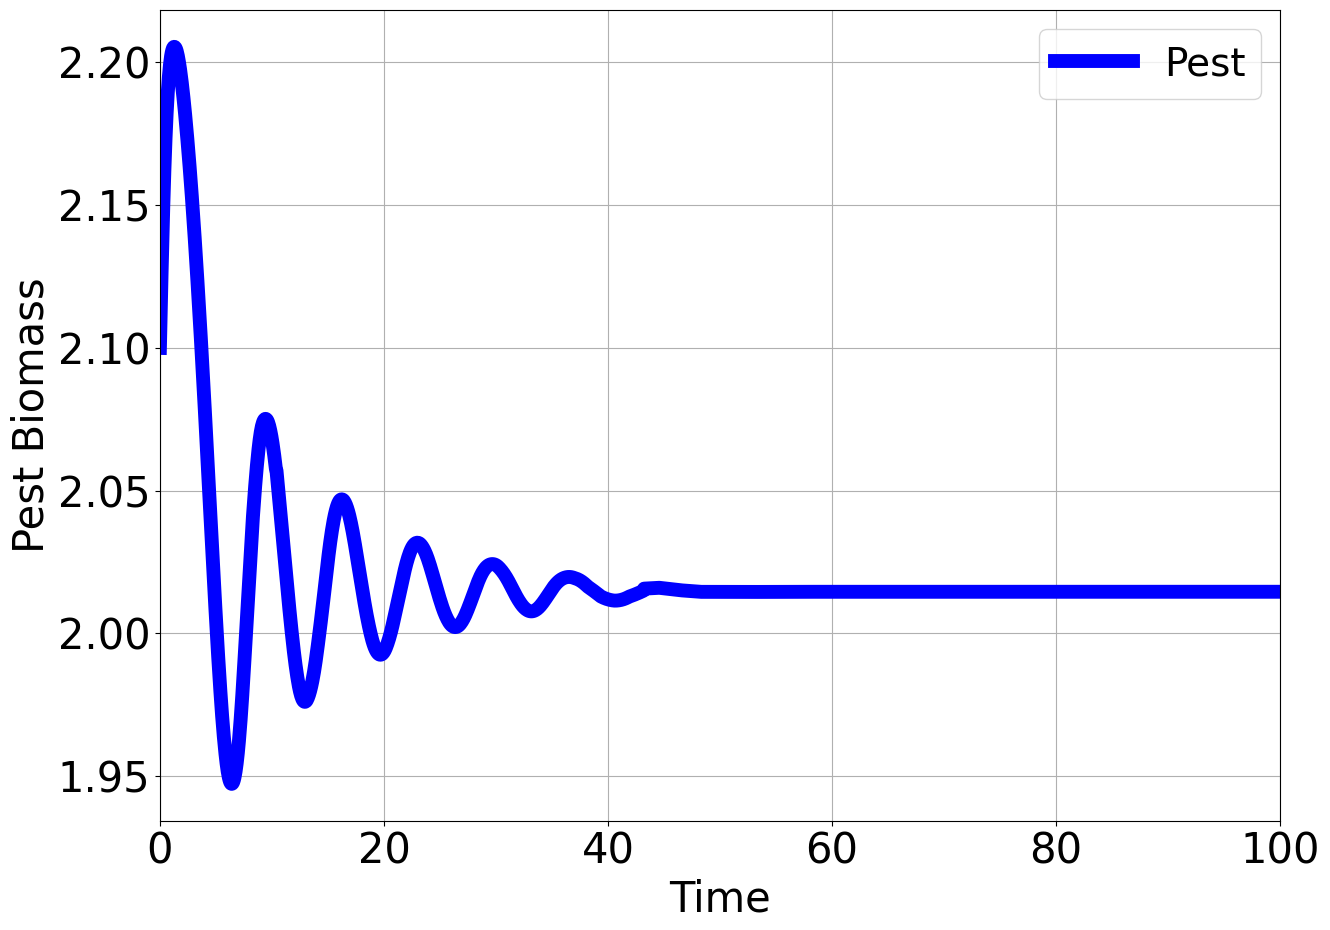

In [24]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_middle_prey.png', format='png')
plt.tight_layout()
plt.show()

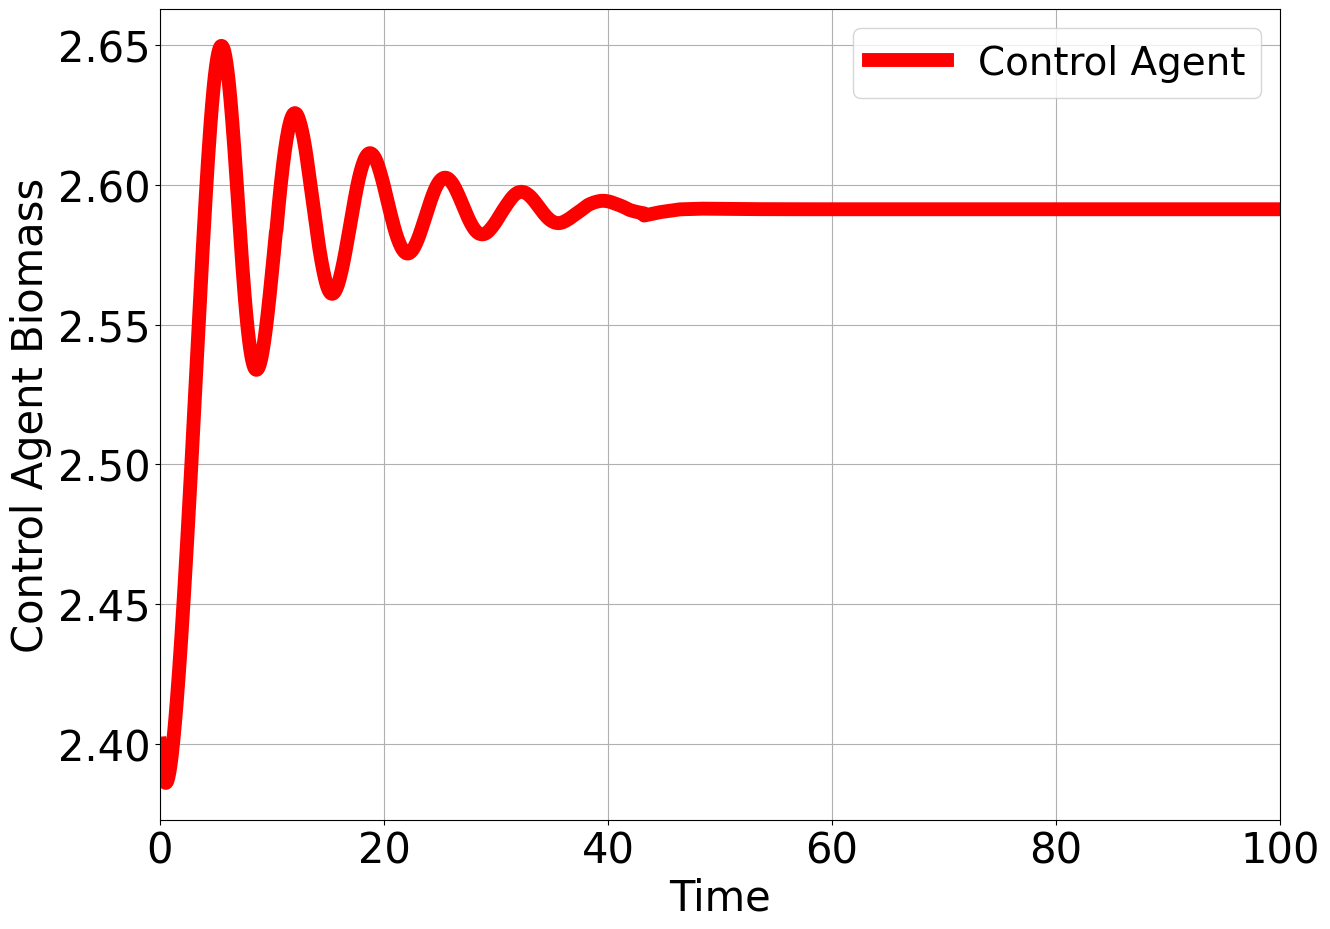

In [25]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_middle_predator.png', format='png')
plt.tight_layout()
plt.show()

## Bottom Row

In [26]:
y0 = np.array([2.1, 5])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,r_R=r_R,K_R=K_R,R_c=R_c,a_CR=a_CR,Th_CR=Th_CR,tetaC=tetaC,ef_RC=ef_RC,mC=mC,P=P,a_PC=a_PC,Th_PC=Th_PC)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

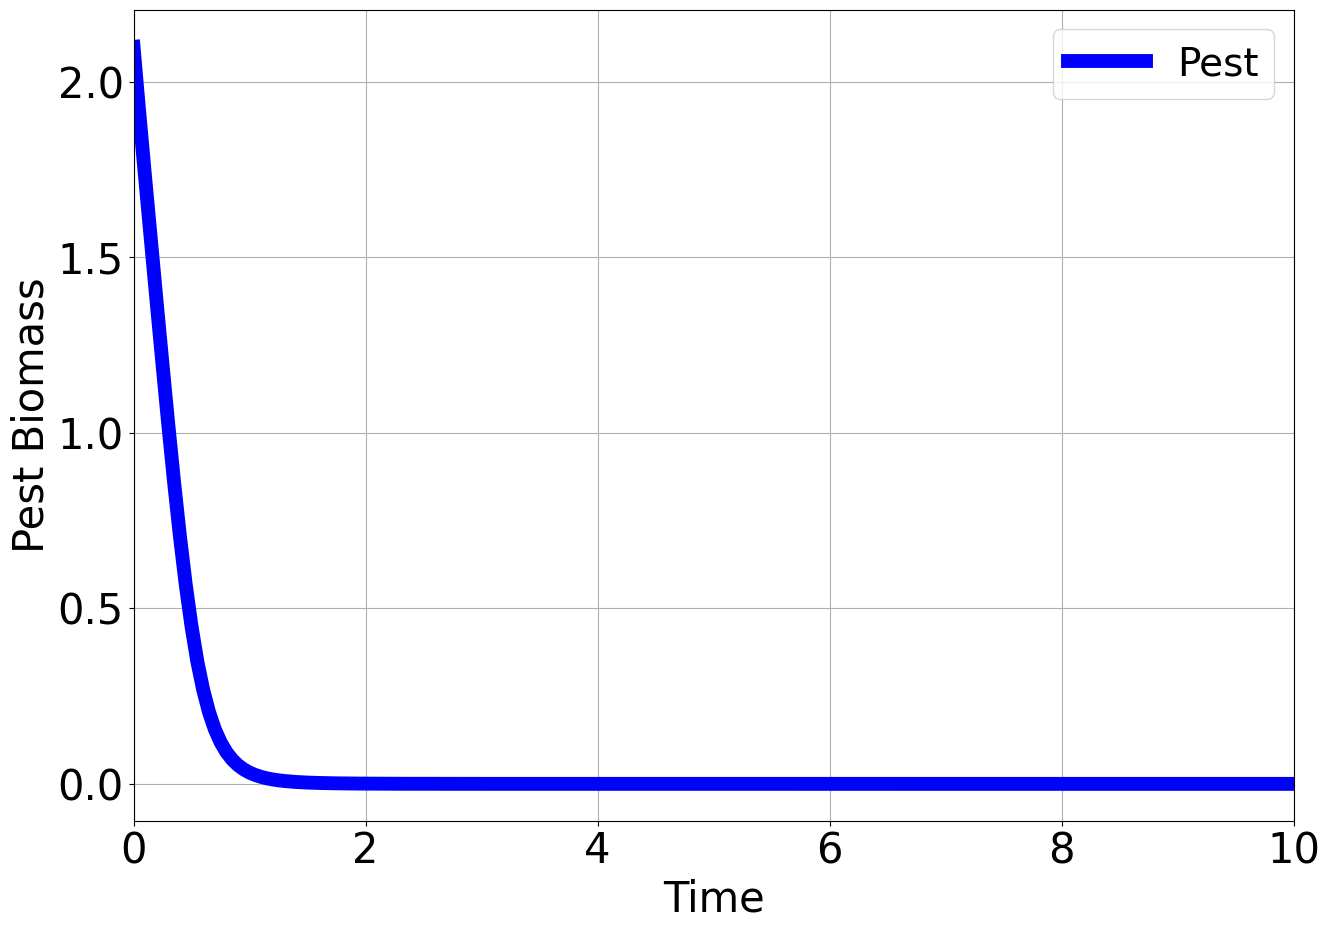

In [27]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 10])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_bottom_prey.png', format='png')
plt.tight_layout()
plt.show()

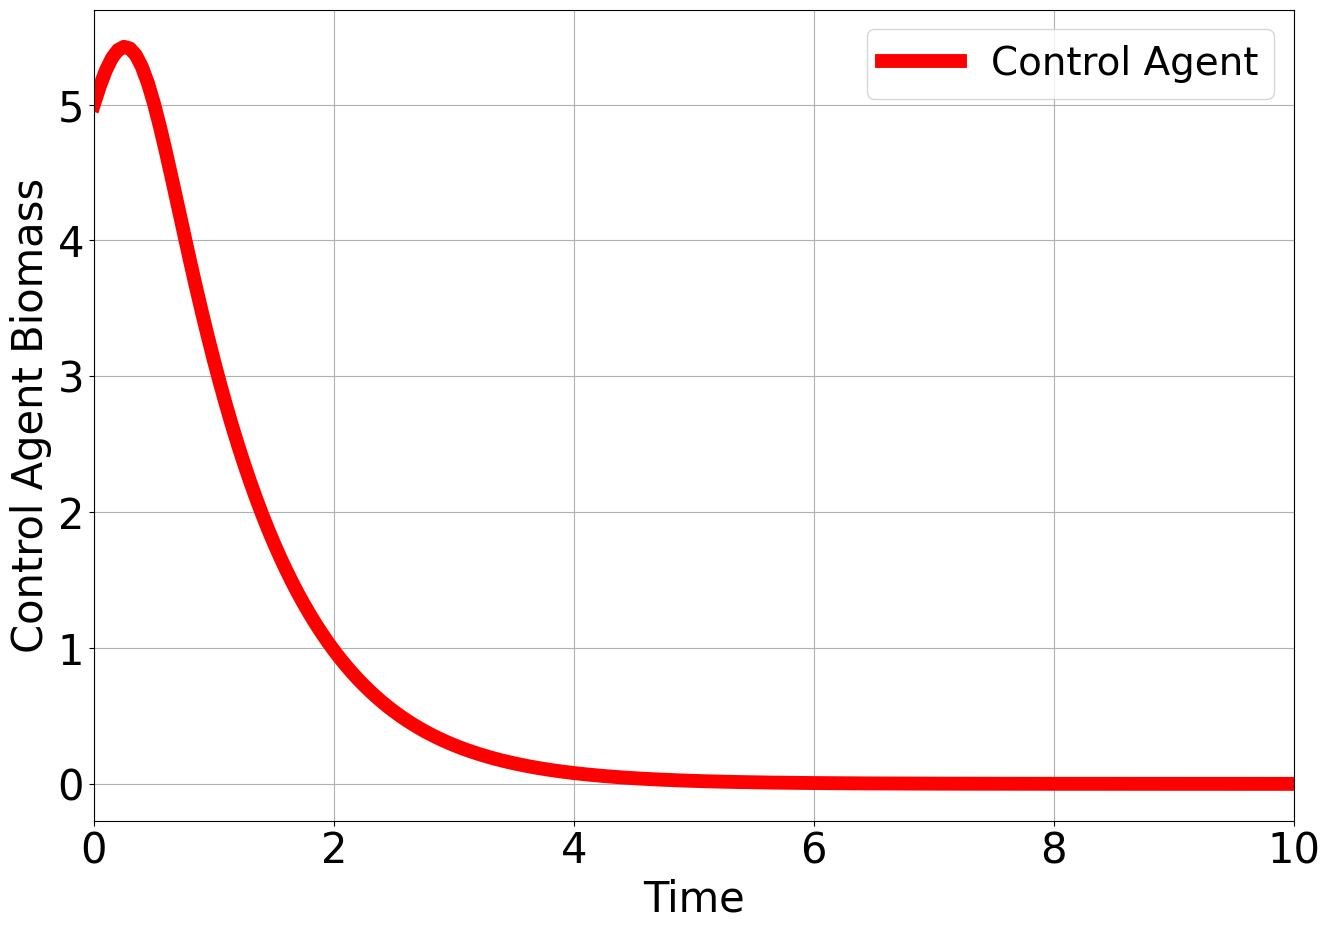

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 10])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/tritrophic_bottom_predator.png', format='png')
plt.tight_layout()
plt.show()

# Omnivory

In [29]:
tmax = 400
step = tmax*20
time_list = np.linspace(0, tmax, step)
num_of_points = step/4

## Parameter values

In [30]:
rr=3
Rc=0.01
K=0.995
a_CR=4.9823
Th_CR=1.2444
ef_RC=1
m_C=0.4
qC=0#0.0005
tetac=0.21
P=0.305
a_PR=0.032
a_PC=0.72
Th_PC=2.5
Th_PR=6.25

In [31]:
def model_exponential_density_mediated(
    t,
    X,
    rr=rr,
    Rc=Rc,
    K=K,
    a_CR=a_CR,
    Th_CR=Th_CR,
    ef_RC=ef_RC,
    m_C=m_C,
    qC=qC,
    tetac=tetac,
    P=P,
    a_PR=a_PR,
    a_PC=a_PC,
    Th_PC=Th_PC,
    Th_PR=Th_PR,
):
    R, C = X
    EAC= C/(tetac+C)
    RF2_CR=(a_CR*R)/(1+a_CR*Th_CR*R)
    RFM_PR=(a_PR*R)/(1+a_PR*Th_PR*R+a_PC*Th_PC*C)
    RFM_PC=(a_PC*C)/(1+a_PR*Th_PR*R+a_PC*Th_PC*C)
    x_prime=rr*R*((R-Rc)/K)*(1-R/K)-RF2_CR*C-RFM_PR*P
    y_prime=ef_RC*EAC*RF2_CR*C-RFM_PC*P-m_C*C-qC*C**2
    return x_prime, y_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    rr=rr,
    Rc=Rc,
    K=K,
    a_CR=a_CR,
    Th_CR=Th_CR,
    ef_RC=ef_RC,
    m_C=m_C,
    qC=qC,
    tetac=tetac,
    P=P,
    a_PR=a_PR,
    a_PC=a_PC,
    Th_PC=Th_PC,
    Th_PR=Th_PR,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(rr,Rc,K,a_CR,Th_CR,ef_RC,m_C,qC,tetac,P,a_PR,a_PC,Th_PC,Th_PR),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

## Top Row

In [32]:
y0 = np.array([0.75, 0.6])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,rr=rr,Rc=Rc,K=K,a_CR=a_CR,Th_CR=Th_CR,ef_RC=ef_RC,m_C=m_C,qC=qC,tetac=tetac,P=P,a_PR=a_PR,a_PC=a_PC,Th_PC=Th_PC,Th_PR=Th_PR)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


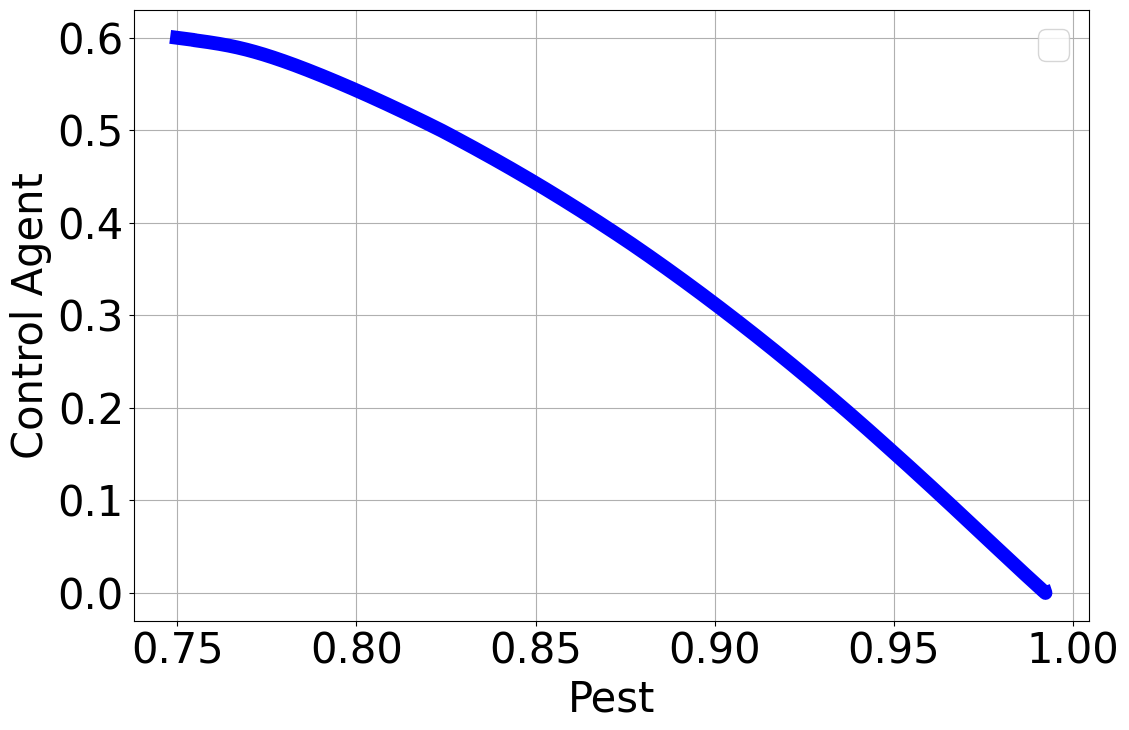

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Prey, Predator, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Pest")
plt.ylabel("Control Agent")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

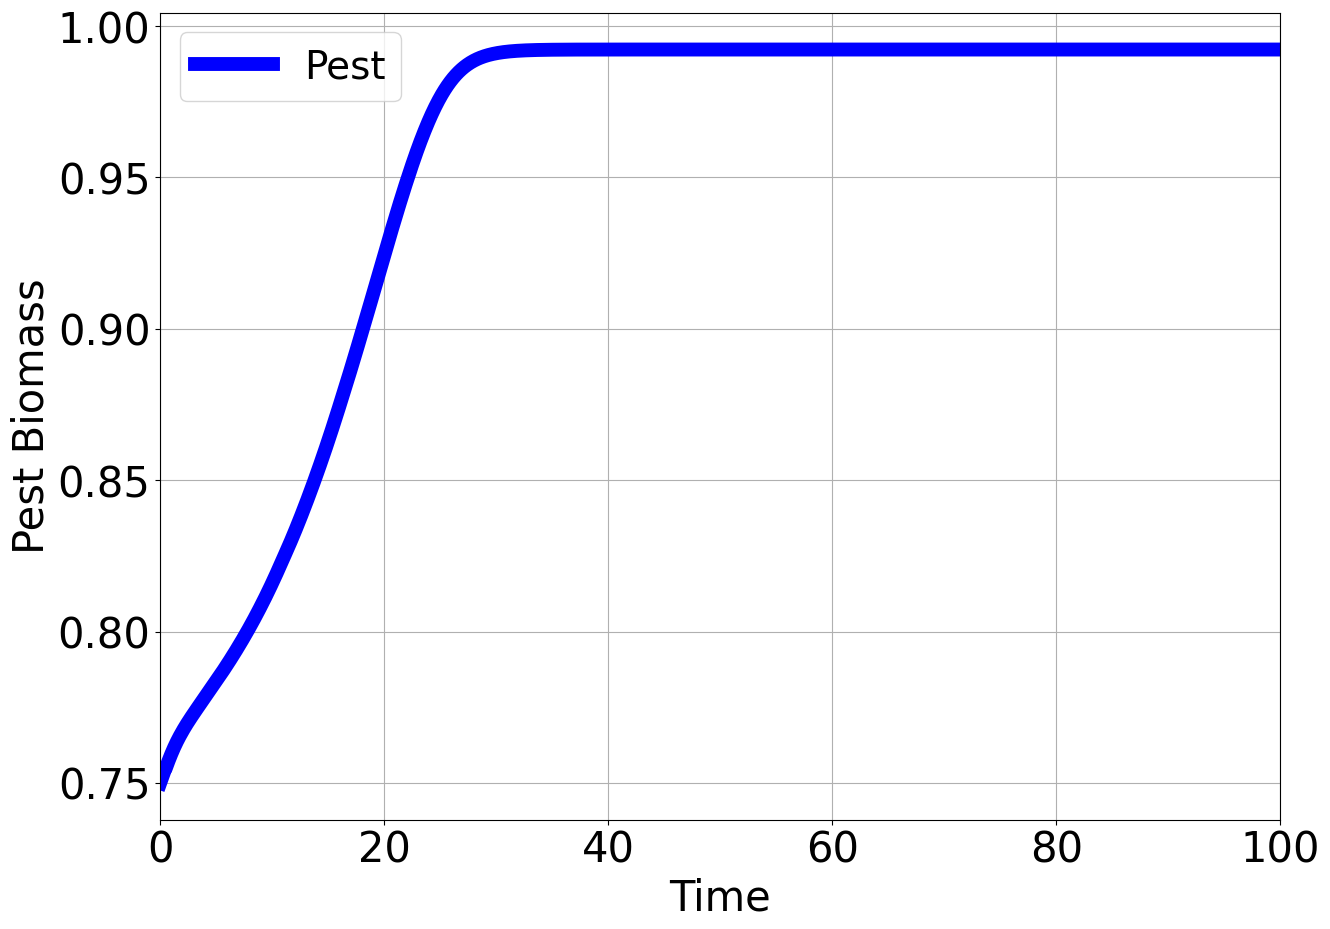

In [34]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_top_prey.png', format='png')
plt.tight_layout()
plt.show()

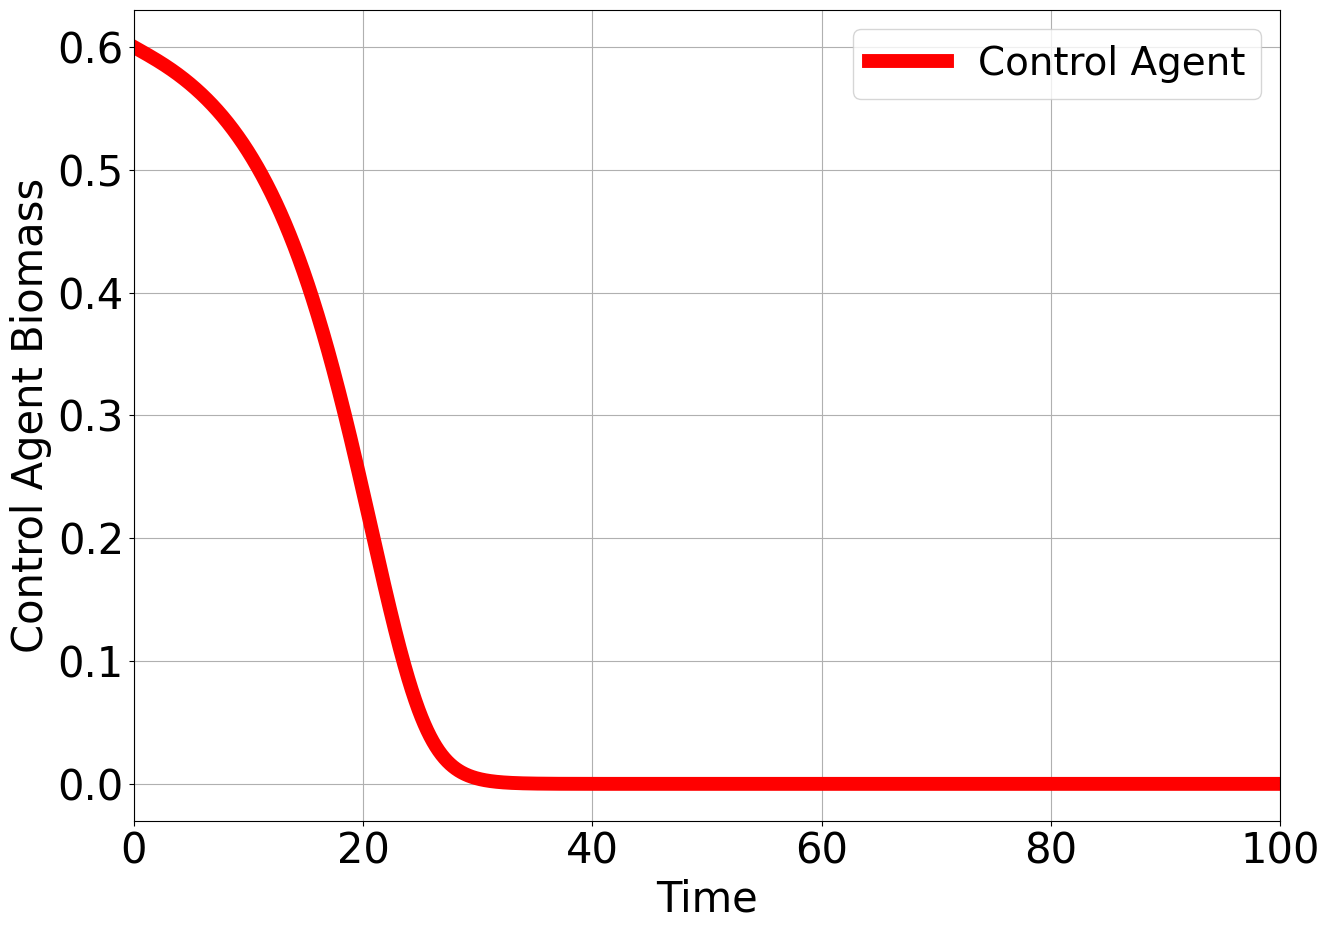

In [35]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_top_predator.png', format='png')
plt.tight_layout()
plt.show()

## Middle Row

In [36]:
y0 = np.array([0.75, 0.65])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,rr=rr,Rc=Rc,K=K,a_CR=a_CR,Th_CR=Th_CR,ef_RC=ef_RC,m_C=m_C,qC=qC,tetac=tetac,P=P,a_PR=a_PR,a_PC=a_PC,Th_PC=Th_PC,Th_PR=Th_PR)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

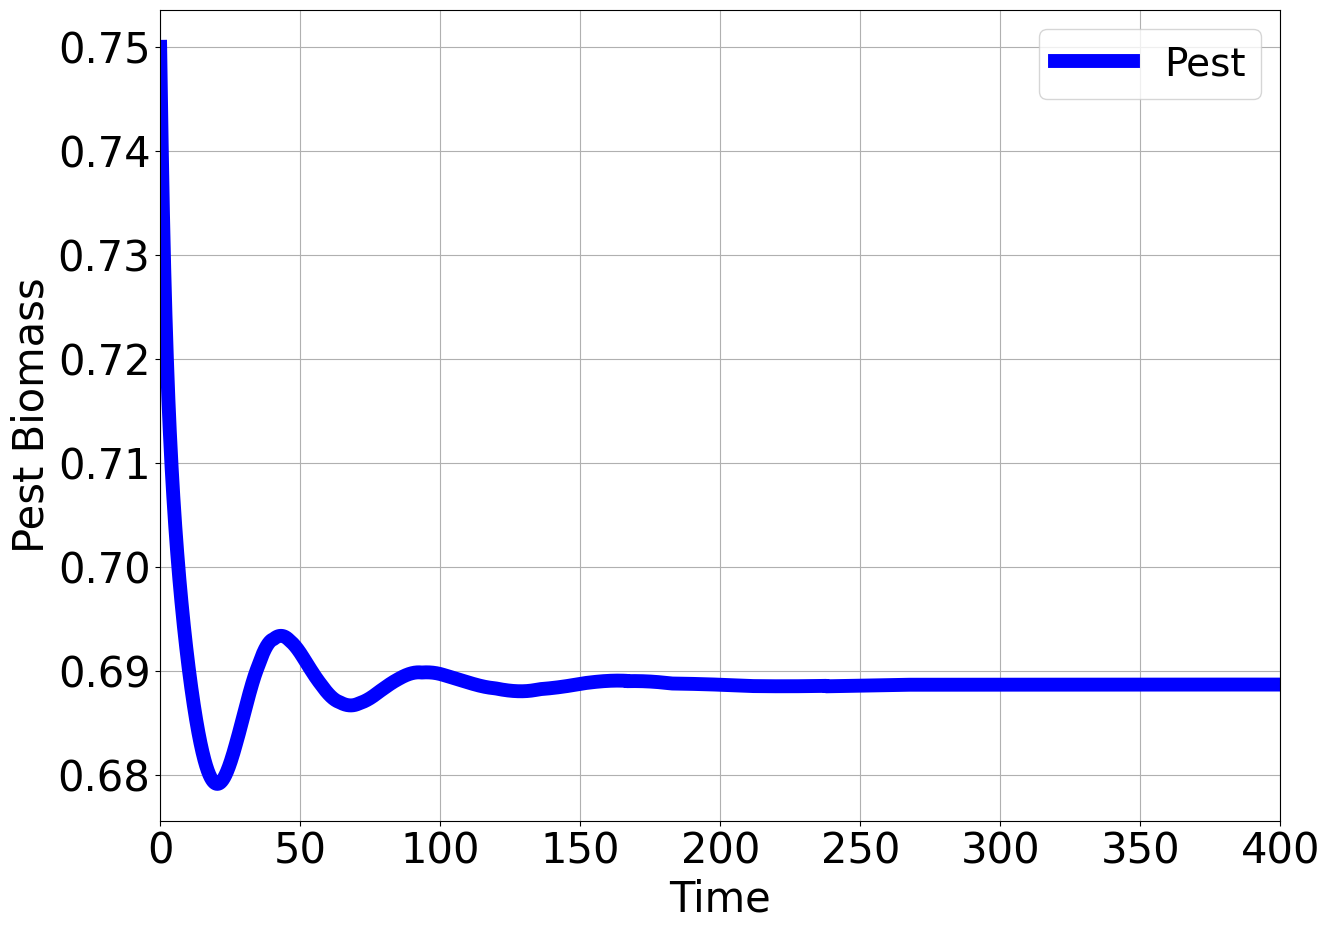

In [37]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_middle_prey.png', format='png')
plt.tight_layout()
plt.show()

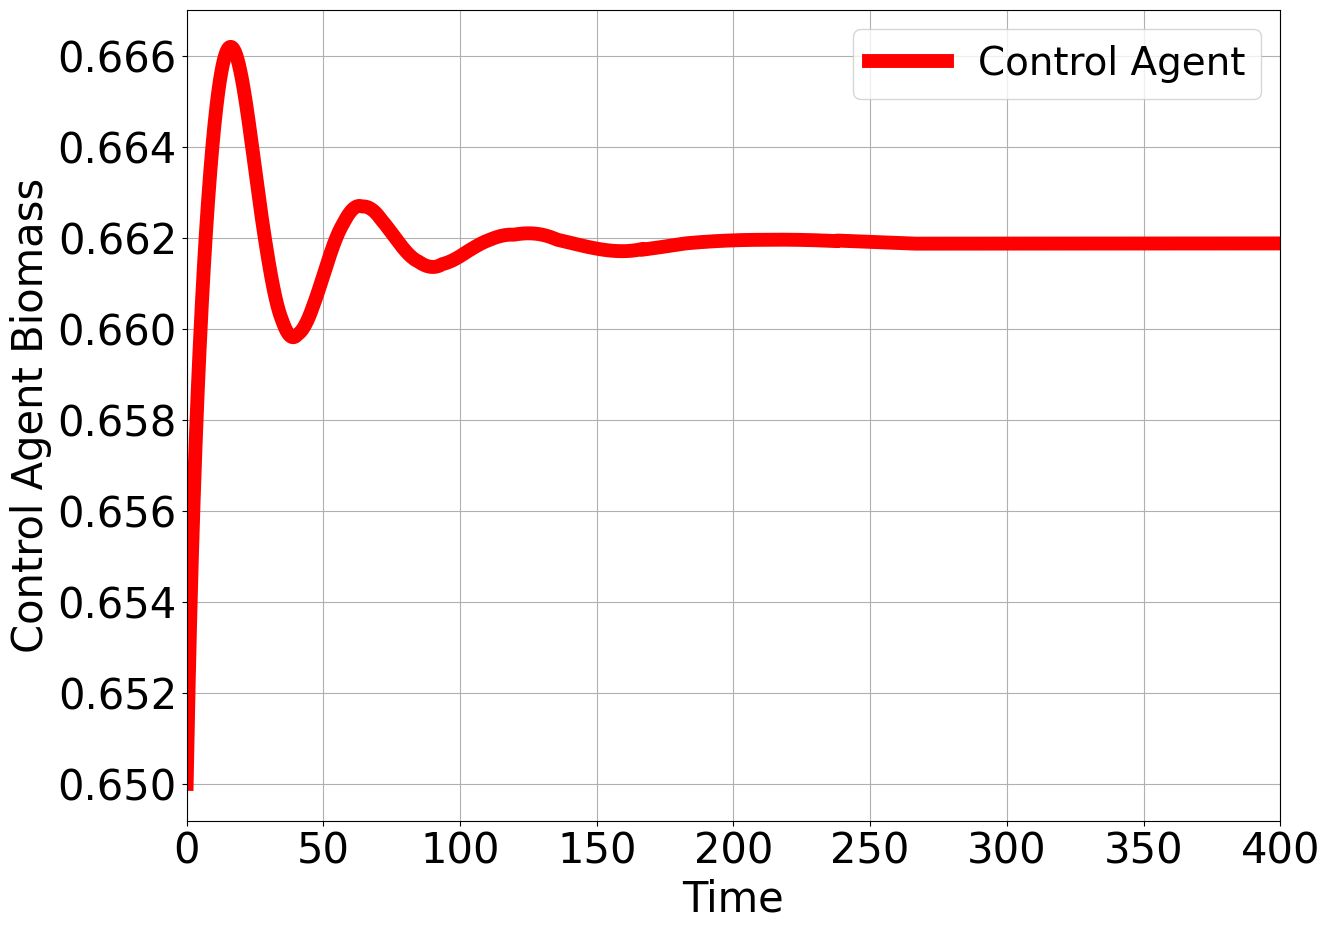

In [38]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_middle_predator.png', format='png')
plt.tight_layout()
plt.show()

## Bottom Row

In [39]:
y0 = np.array([0.75, 0.7])

solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,rr=rr,Rc=Rc,K=K,a_CR=a_CR,Th_CR=Th_CR,ef_RC=ef_RC,m_C=m_C,qC=qC,tetac=tetac,P=P,a_PR=a_PR,a_PC=a_PC,Th_PC=Th_PC,Th_PR=Th_PR)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Prey, Predator = y_computed_exponential_density_mediated

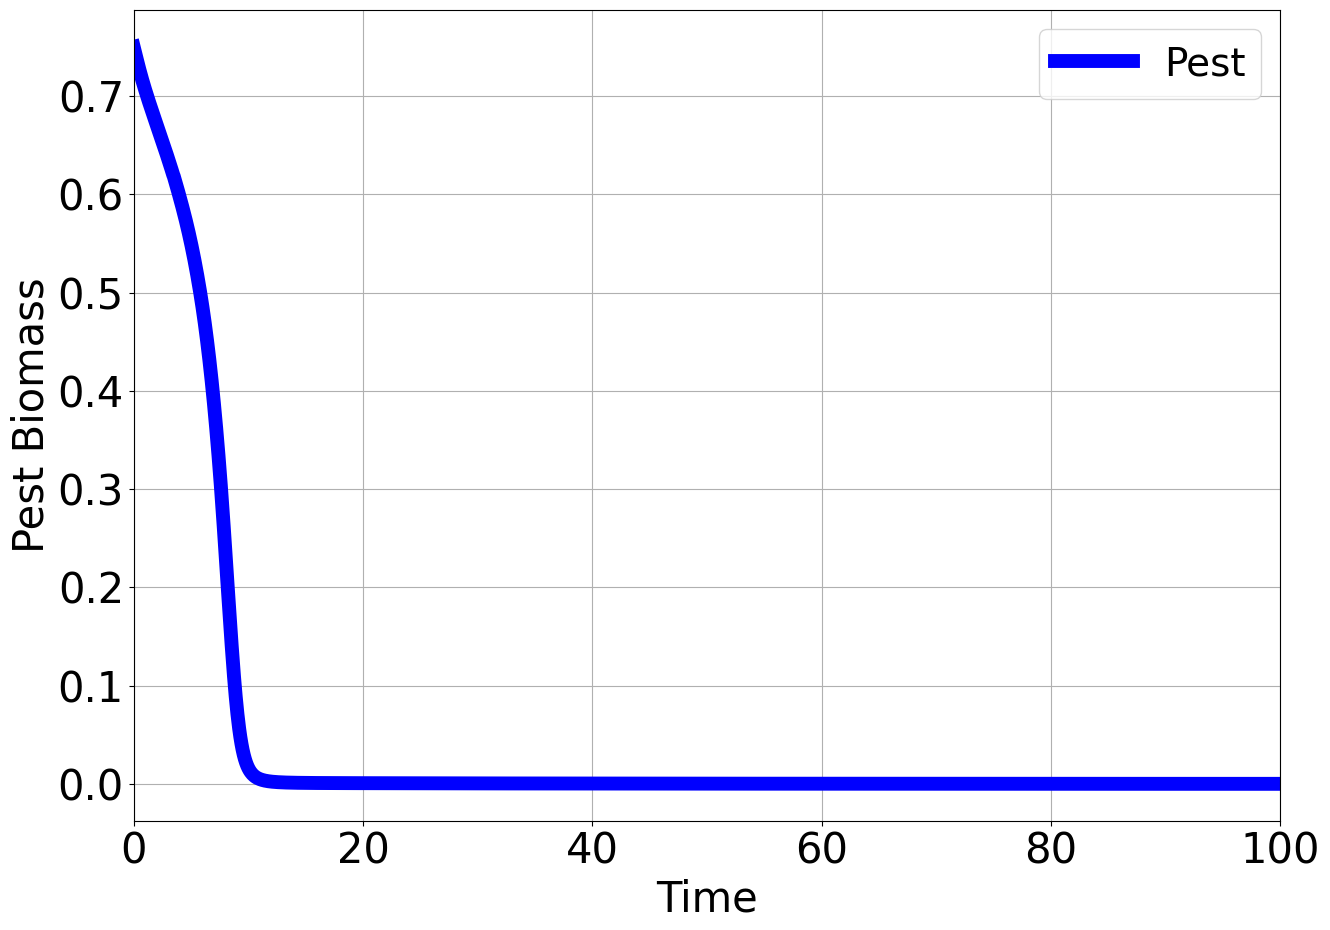

In [40]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Prey, label="Pest", linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Time")
plt.ylabel("Pest Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_bottom_prey.png', format='png')
plt.tight_layout()
plt.show()

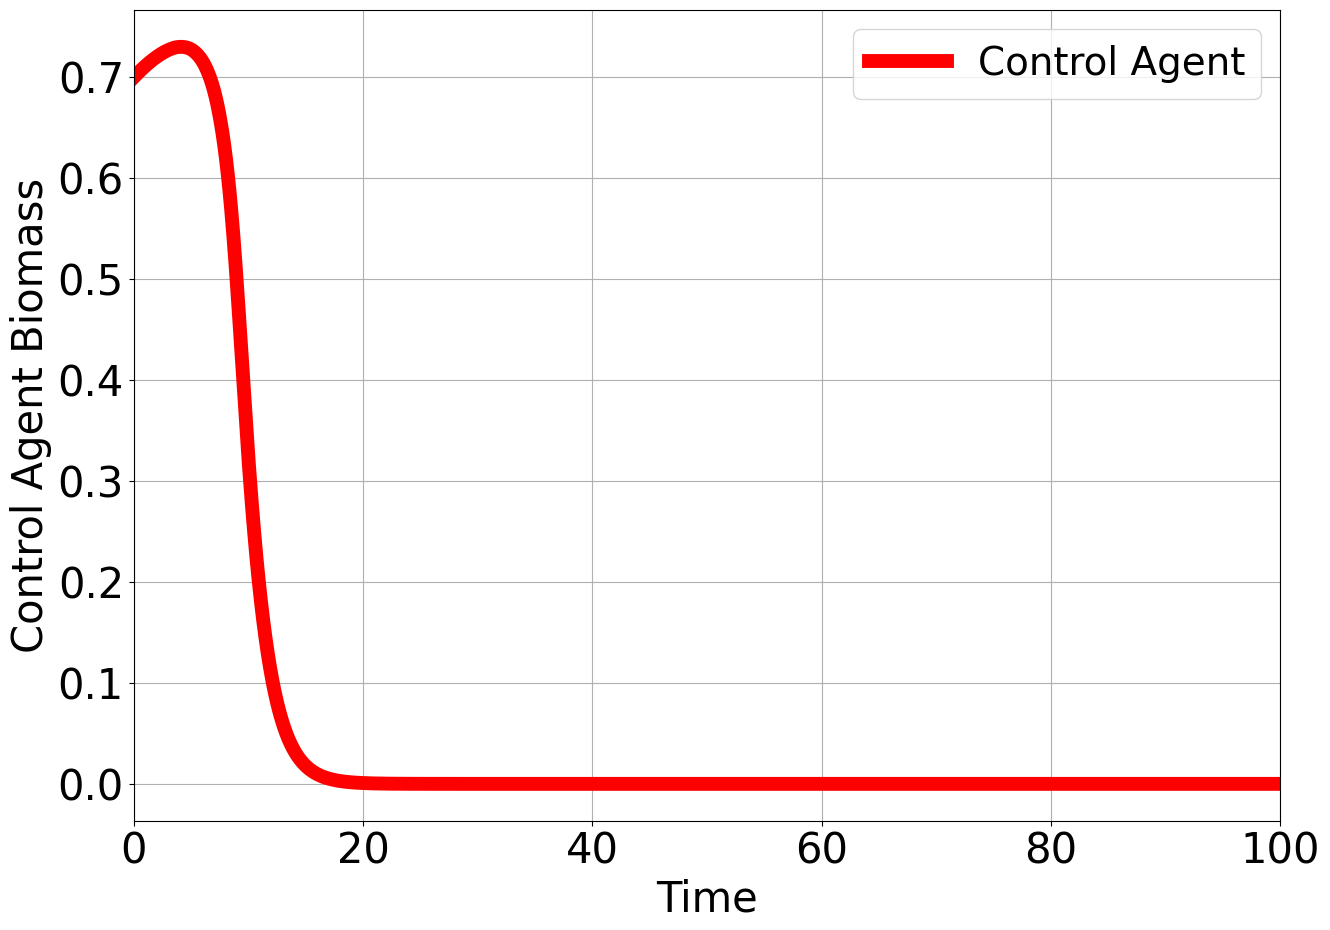

In [41]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Predator, label="Control Agent", linestyle="-", linewidth=10, markersize=12,color="r")

plt.xlabel("Time")
plt.ylabel("Control Agent Biomass")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, 100])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/omnivory_bottom_predator.png', format='png')
plt.tight_layout()
plt.show()